In [1]:
import sys
from pathlib import Path
project_root = Path().resolve().parent  
sys.path.append(str(project_root))
from calculator_core import *
from calculator_core.ATP_DEC import *

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_log_error, root_mean_squared_error

In [3]:
routes = [
    "BKK-CPH",
    "CPH-BKK",
    "FRA-ICN",
    "HEL-NRT",
    "ICN-FRA",
    "ICN-LHR",
    "LHR-ICN",
    "LHR-PVG",
    "NRT-HEL",
    "PVG-LHR",
    "SIN-ZRH",
    "ZRH-SIN"
]

In [4]:
p_class = 'business'

In [ ]:
results = []
for year in [2019, 2023]:
    for route in routes:
        path = project_root / "results" / str(year) / route / f"results_CF_filtered_7D.csv"
        
        if not os.path.exists(path):
            continue

        df = pd.read_csv(path)
        df_1 = df.dropna(subset=[f'actual_footprint_{p_class}_30D', f'post_footprint_{p_class}_30D', f'post_footprint_{p_class}_7D', f'pre_footprint_{p_class}_7D'])

        if df_1.empty:
            continue

        # MSPE for each method
        mspe_post_30 = mean_absolute_percentage_error(df_1[f'actual_footprint_{p_class}_30D'], df_1[f'post_footprint_{p_class}_30D']) * 100
        mspe_post_7 = mean_absolute_percentage_error(df_1[f'actual_footprint_{p_class}_30D'], df_1[f'post_footprint_{p_class}_7D']) * 100
        mspe_pre = mean_absolute_percentage_error(df_1[f'actual_footprint_{p_class}_30D'], df_1[f'pre_footprint_{p_class}_7D']) * 100
        results.append({"Year": year, "Route": route, "Method": "Post 30", "MSPE": mspe_post_30})
        results.append({"Year": year, "Route": route, "Method": "Post 7", "MSPE": mspe_post_7})
        results.append({"Year": year, "Route": route, "Method": "Pre", "MSPE": mspe_pre})

df_results = pd.DataFrame(results)


In [ ]:
for year in [2019, 2023]:
    for route in routes:
        path = project_root / "results" / str(year) / route / f"results_CF_filtered_7D.csv"
        df = pd.read_csv(path)
        df_1 = df.dropna()

        print(f"{year}, {route}, Post 30. RMSE: {mean_absolute_percentage_error(df_1[f'actual_footprint_{p_class}_30D'], df_1[f'post_footprint_{p_class}_30D']) * 100:.2f}")
        print(f"{year}, {route}, Post 7. RMSE: {mean_absolute_percentage_error(df_1[f'actual_footprint_{p_class}_30D'], df_1[f'post_footprint_{p_class}_7D'])* 100:.2f}")
        print(f"{year}, {route}, Pre. RMSE: {mean_absolute_percentage_error(df_1[f'actual_footprint_{p_class}_30D'], df_1[f'pre_footprint_{p_class}_7D']) * 100:.2f}")

2019, BKK-CPH, Post 30. RMSE: 1.15
2019, BKK-CPH, Post 7. RMSE: 0.76
2019, BKK-CPH, Pre. RMSE: 6.07
2019, CPH-BKK, Post 30. RMSE: 1.58
2019, CPH-BKK, Post 7. RMSE: 1.07
2019, CPH-BKK, Pre. RMSE: 7.38
2019, FRA-ICN, Post 30. RMSE: 1.50
2019, FRA-ICN, Post 7. RMSE: 1.47
2019, FRA-ICN, Pre. RMSE: 15.67
2019, HEL-NRT, Post 30. RMSE: 2.44
2019, HEL-NRT, Post 7. RMSE: 2.32
2019, HEL-NRT, Pre. RMSE: 20.78
2019, ICN-FRA, Post 30. RMSE: 2.05
2019, ICN-FRA, Post 7. RMSE: 2.02
2019, ICN-FRA, Pre. RMSE: 17.60
2019, ICN-LHR, Post 30. RMSE: 1.93
2019, ICN-LHR, Post 7. RMSE: 1.85
2019, ICN-LHR, Pre. RMSE: 20.40
2019, LHR-ICN, Post 30. RMSE: 1.14
2019, LHR-ICN, Post 7. RMSE: 1.15
2019, LHR-ICN, Pre. RMSE: 17.06
2019, LHR-PVG, Post 30. RMSE: 0.98
2019, LHR-PVG, Post 7. RMSE: 1.00
2019, LHR-PVG, Pre. RMSE: 14.91
2019, NRT-HEL, Post 30. RMSE: 2.07
2019, NRT-HEL, Post 7. RMSE: 1.91
2019, NRT-HEL, Pre. RMSE: 25.21
2019, PVG-LHR, Post 30. RMSE: 1.29
2019, PVG-LHR, Post 7. RMSE: 1.28
2019, PVG-LHR, Pre. RMSE

In [7]:
pal =["C1", "C9", "C7"]

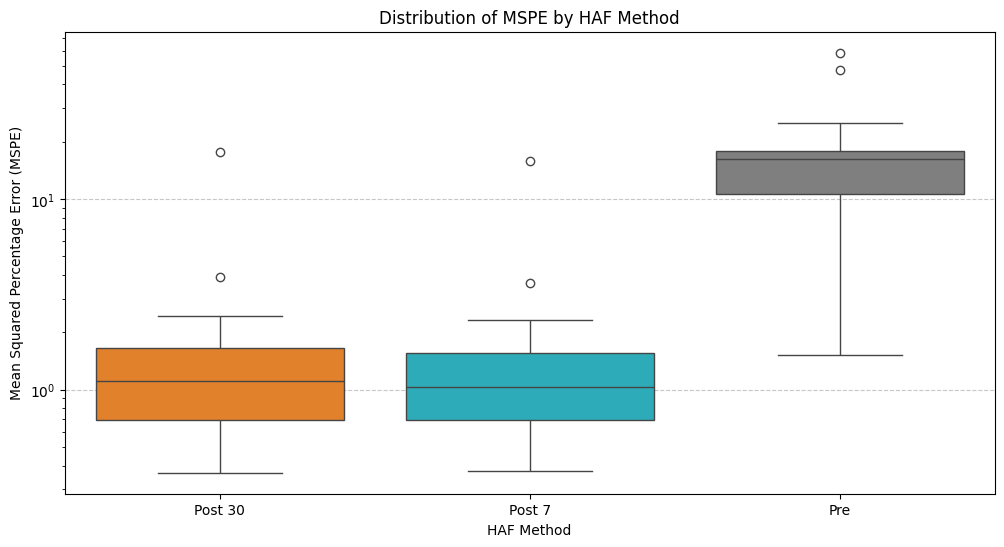

In [8]:
# Pivot and melt for plotting
pivot_df = df_results.pivot(index=["Year", "Route"], columns="Method", values="MSPE").reset_index()
melted_df = pivot_df.melt(id_vars=["Year", "Route"], var_name="Method", value_name="MSPE")

# Boxplot of MSPE by method
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x="Method", y="MSPE", hue="Method", palette=pal)
plt.title("Distribution of MSPE by HAF Method")
plt.ylabel("Mean Squared Percentage Error (MSPE)")
plt.xlabel("HAF Method")
plt.yscale("log")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

C:\Users\finnm\AppData\Local\Temp\ipykernel_17296\619378308.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted_df, x="Year-Route", y="MSPE", hue="Method", palette=pal, ci=None)


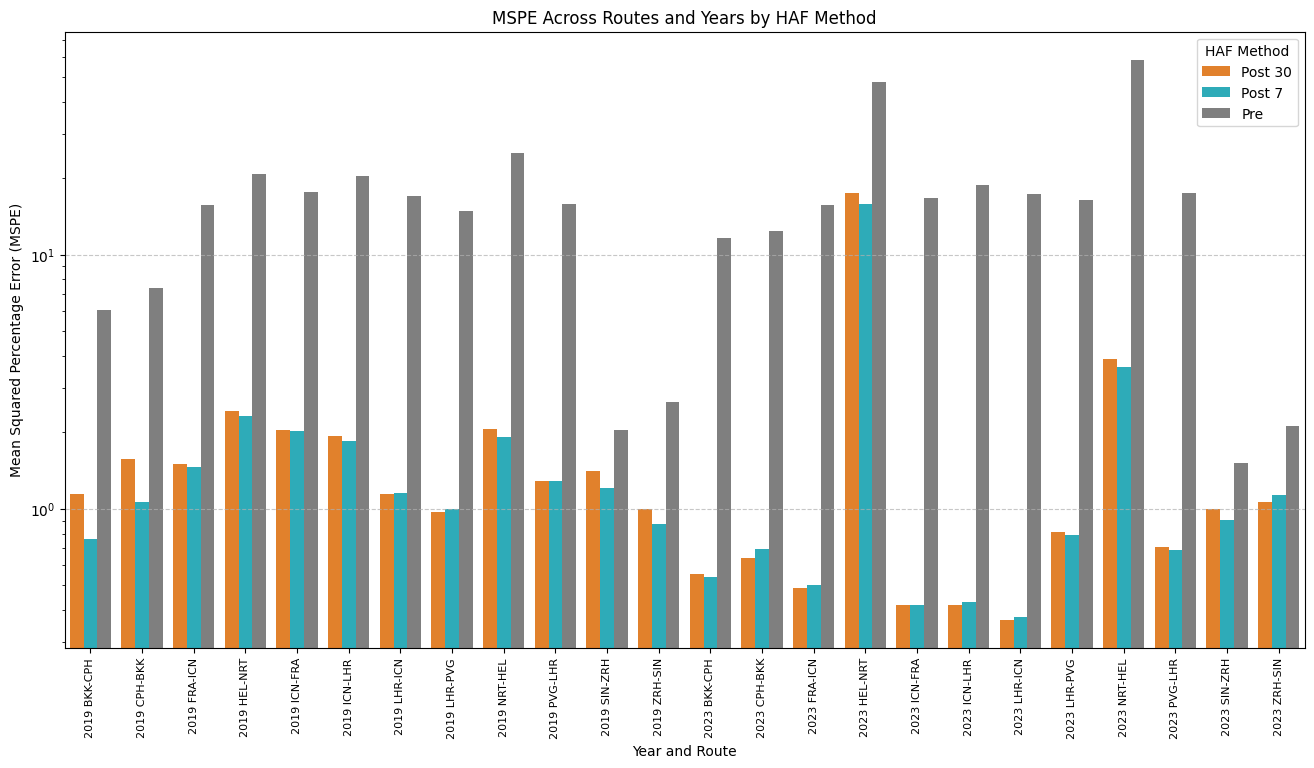

In [9]:
# Add a combined identifier for each route/year for visualization
melted_df["Year-Route"] = melted_df["Year"].astype(str) + " " + melted_df["Route"]

# Barplot of MSPE across routes and years
plt.figure(figsize=(16, 8))
sns.barplot(data=melted_df, x="Year-Route", y="MSPE", hue="Method", palette=pal, ci=None)
plt.title("MSPE Across Routes and Years by HAF Method")
plt.ylabel("Mean Squared Percentage Error (MSPE)")
plt.xlabel("Year and Route")
plt.yscale("log")
plt.xticks(rotation=90, fontsize=8)
plt.legend(title="HAF Method")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()